# **Predicting Stock Market Volatility using Machine Learning Techniques**



The dispersion of returns for a certain stock or market index is measured by stock market volatility. The stock market's volatility can serve as a predictor of both positive and negative trends. Fund managers, analysts, and investors are all quite interested in predicting these trends to base their investment decisions upon. However, as financial markets are complicated, predicting stock market volatility is a difficult undertaking, hence why using Machine Learning Methods can possibly prove to be a handy tool for determining stock trends.



# Dataset:  
https://www.kaggle.com/datasets/khushipitroda/stock-market-historical-data-of-top-10-companies


File Name:    (  data.csv  )

# **Research Questions**

(1) How does the distribution of trading volume and stock prices (Close/Last, Open, High, Low) vary across the top 10 companies in the stock market, and how do these variables correlate with each other?

(2) Which Machine Learning Model Can be best implemented to predict a stock's closing price?  

(3) Can we classify whether a stock's closing price will increase or decrease the next day based on the current day's high, low, open, close, and volume?

(4) Do certain companies show a more consistent stock price pattern than others?


In [ ]:
# Research Question 1

# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Loading the dataset
#data = pd.read_csv("/Users/humzagohar/Desktop/data.csv")
data = pd.read_csv("data.csv")

# Converting Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Cleaning the Close/Last, Open, High, Low columns to remove '$' and convert to numeric
for col in ['Close/Last', 'Open', 'High', 'Low']:
    data[col] = pd.to_numeric(data[col].str.replace('$', ''))

# Displaying the first few rows of the dataset
print(data.head())

# Calculating variability metrics for each company
metrics = ['Volume', 'Close/Last', 'Open', 'High', 'Low']
variability = data.groupby('Company')[metrics].agg(['min', 'max', 'var', 'std'])
print(variability)

<ipython-input-1-d17d1ef376b8>:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = pd.to_numeric(data[col].str.replace('$', ''))


  Company       Date  Close/Last    Volume    Open      High     Low
0    AAPL 2023-07-17      193.99  50520160  191.90  194.3200  191.81
1    AAPL 2023-07-14      190.69  41616240  190.23  191.1799  189.63
2    AAPL 2023-07-13      190.54  41342340  190.50  191.1900  189.78
3    AAPL 2023-07-12      189.77  60750250  189.68  191.7000  188.47
4    AAPL 2023-07-11      188.08  46638120  189.16  189.3000  186.60
           Volume                                         Close/Last  \
              min         max           var           std        min   
Company                                                                
AAPL     31346600  1065209454  9.358879e+15  9.674130e+07    14.9639   
AMD       2606577   323844500  1.436515e+15  3.790139e+07     1.6200   
AMZN     17626740   476934400  1.729264e+15  4.158442e+07    14.0465   
CSCO      5720538   242245000  1.666906e+14  1.291087e+07    20.2400   
META      5913066   365091700  5.126235e+14  2.264119e+07    25.8810   
MSFT      

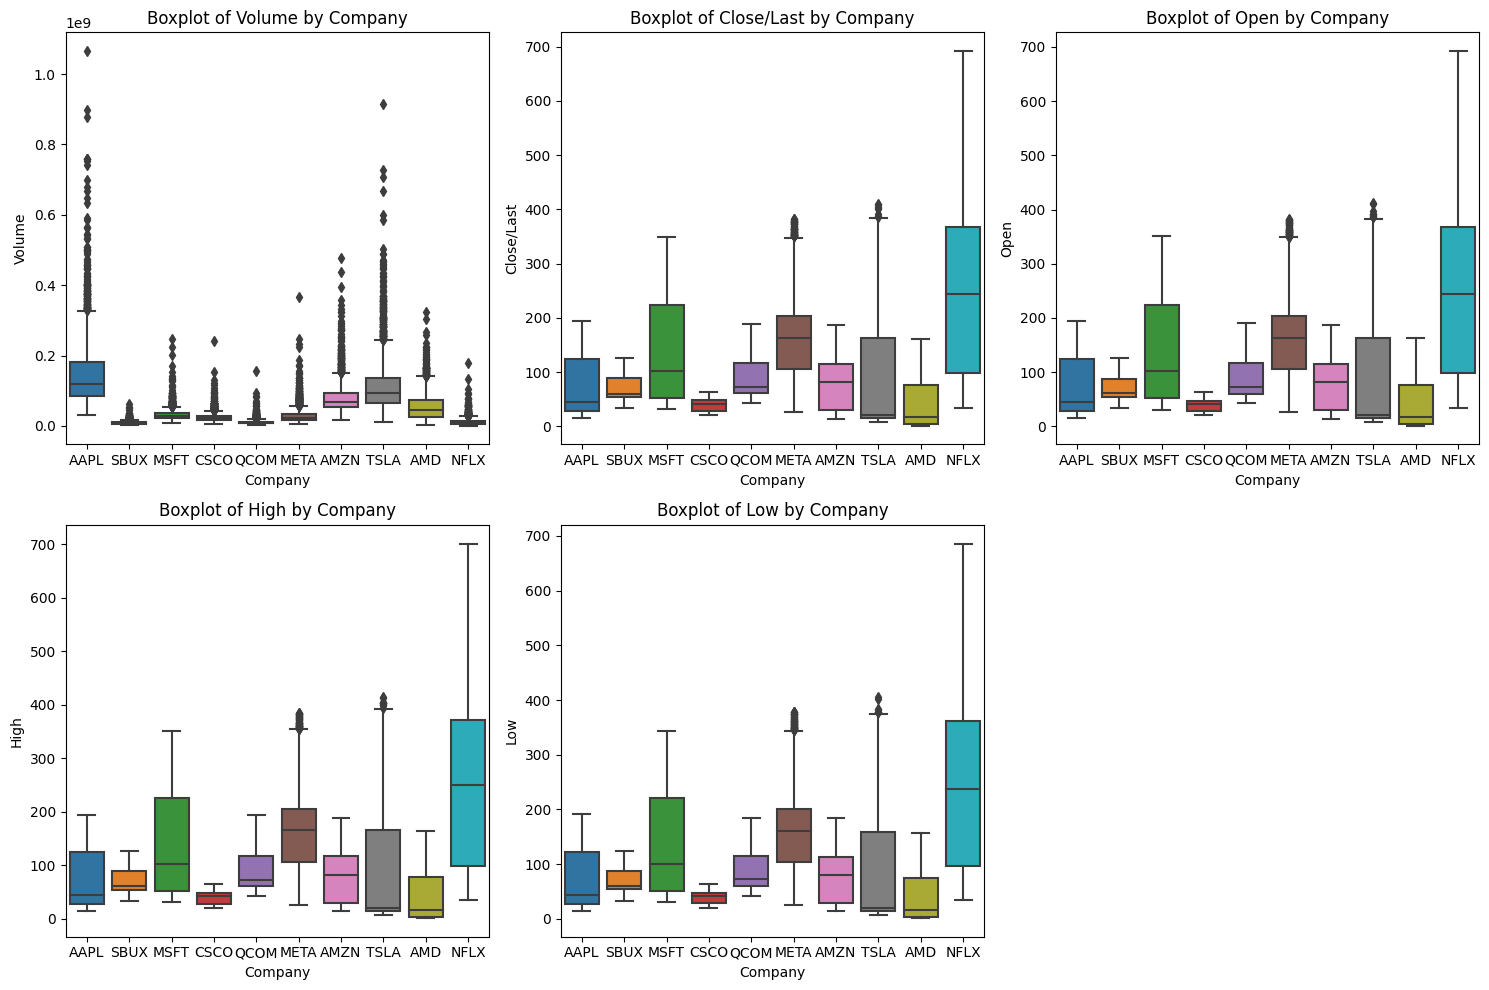

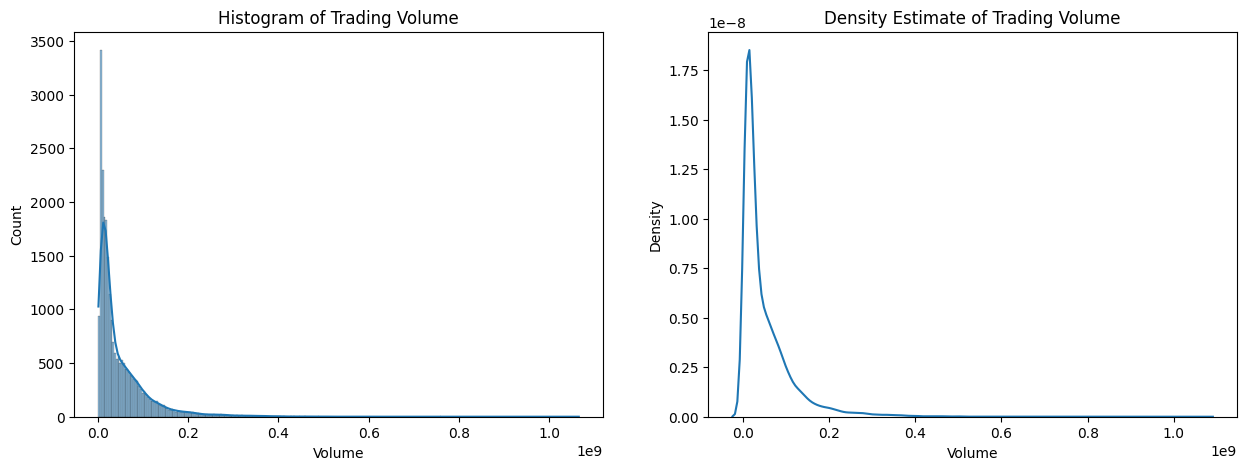

In [ ]:
# Boxplots for trading volume and stock prices
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Company', y=metric, data=data)
    plt.title(f'Boxplot of {metric} by Company')
plt.tight_layout()
plt.show()

# Histograms and density estimates for trading volume
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Volume'], kde=True)
plt.title('Histogram of Trading Volume')
plt.subplot(1, 2, 2)
sns.kdeplot(data['Volume'])
plt.title('Density Estimate of Trading Volume')
plt.show()



<Figure size 1000x800 with 0 Axes>

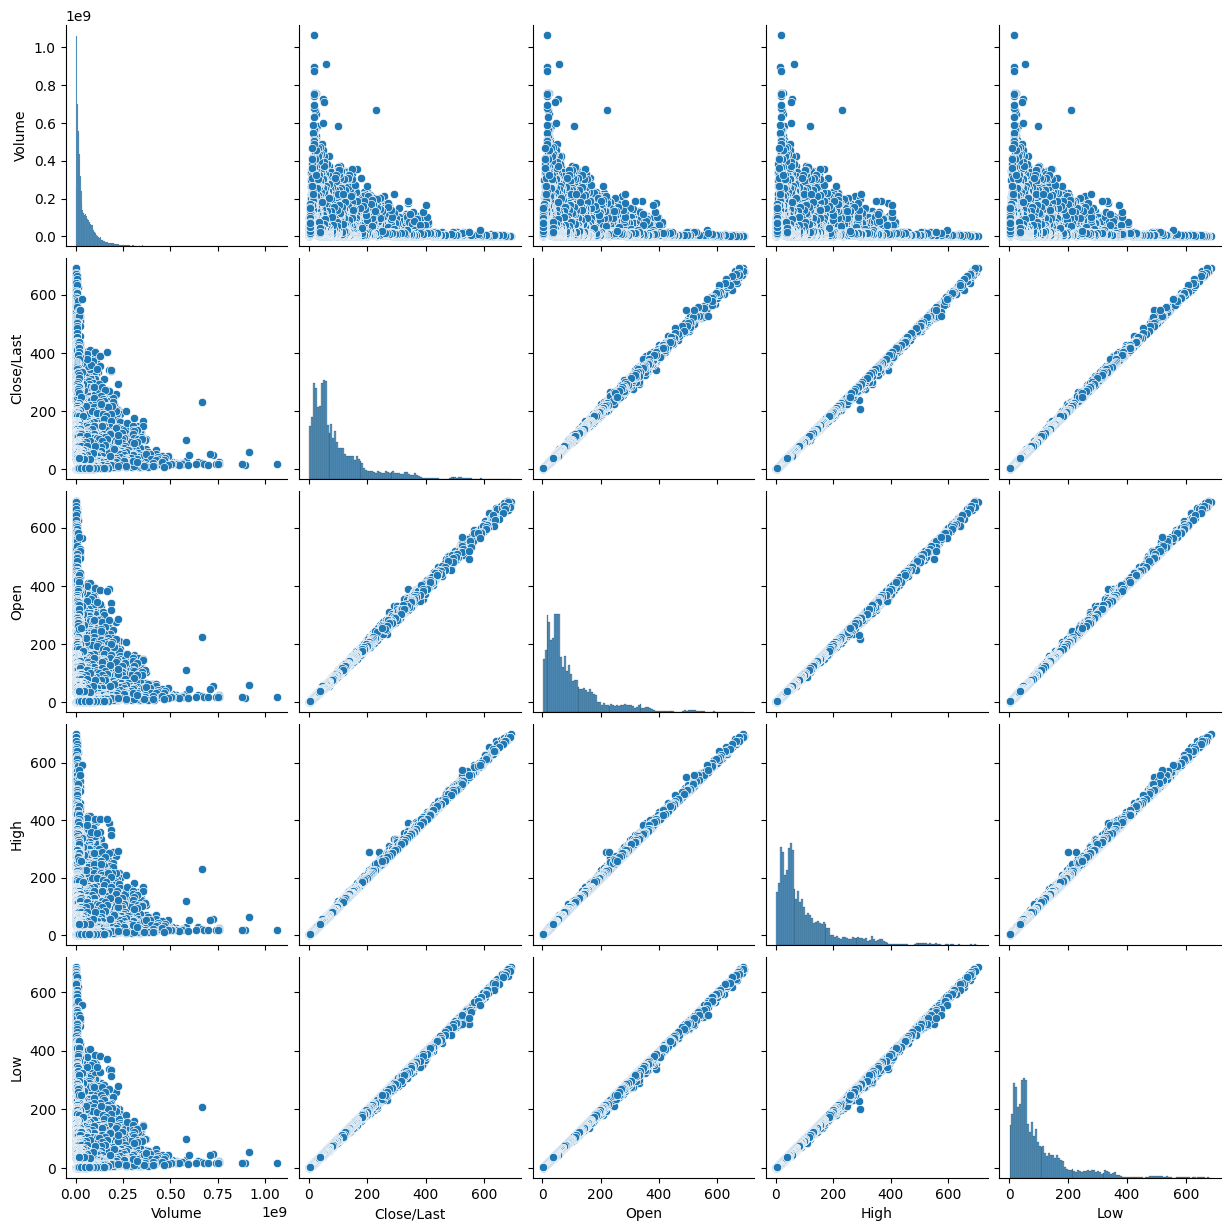

Correlation Matrix:               Volume  Close/Last      Open      High       Low
Volume      1.000000   -0.213019 -0.212990 -0.210444 -0.215782
Close/Last -0.213019    1.000000  0.999588  0.999784  0.999800
Open       -0.212990    0.999588  1.000000  0.999798  0.999791
High       -0.210444    0.999784  0.999798  1.000000  0.999697
Low        -0.215782    0.999800  0.999791  0.999697  1.000000


In [ ]:

# Scatter plot and correlation matrix
plt.figure(figsize=(10, 8))
sns.pairplot(data[metrics])
plt.show()

corr_matrix = data[metrics].corr()
print("Correlation Matrix:", corr_matrix)



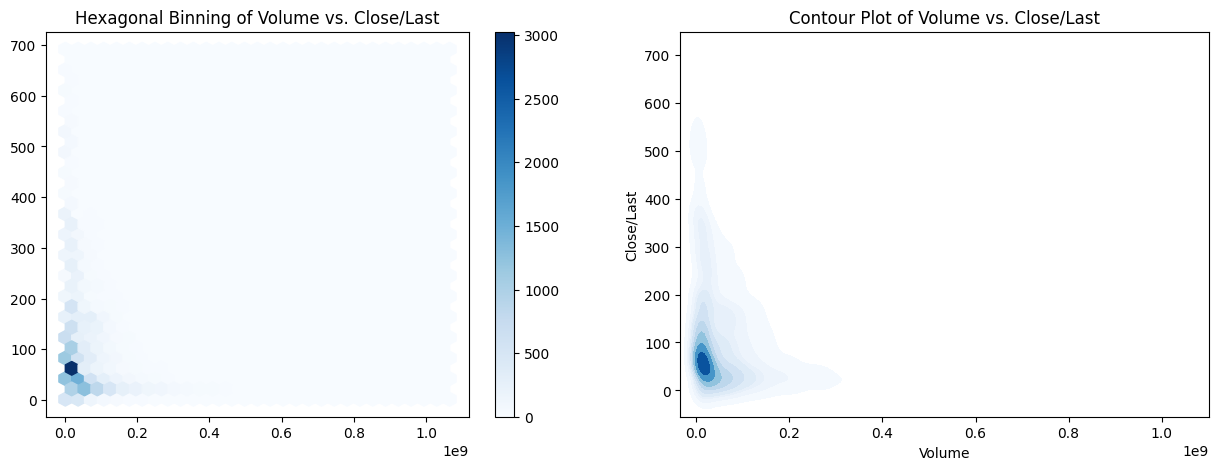

In [ ]:
# Hexagonal binning and contours for Volume vs. Close/Last
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hexbin(data['Volume'], data['Close/Last'], gridsize=30, cmap='Blues')
plt.colorbar()
plt.title('Hexagonal Binning of Volume vs. Close/Last')
plt.subplot(1, 2, 2)
sns.kdeplot(data=data, x='Volume', y='Close/Last', cmap='Blues', fill=True)
plt.title('Contour Plot of Volume vs. Close/Last')
plt.show()


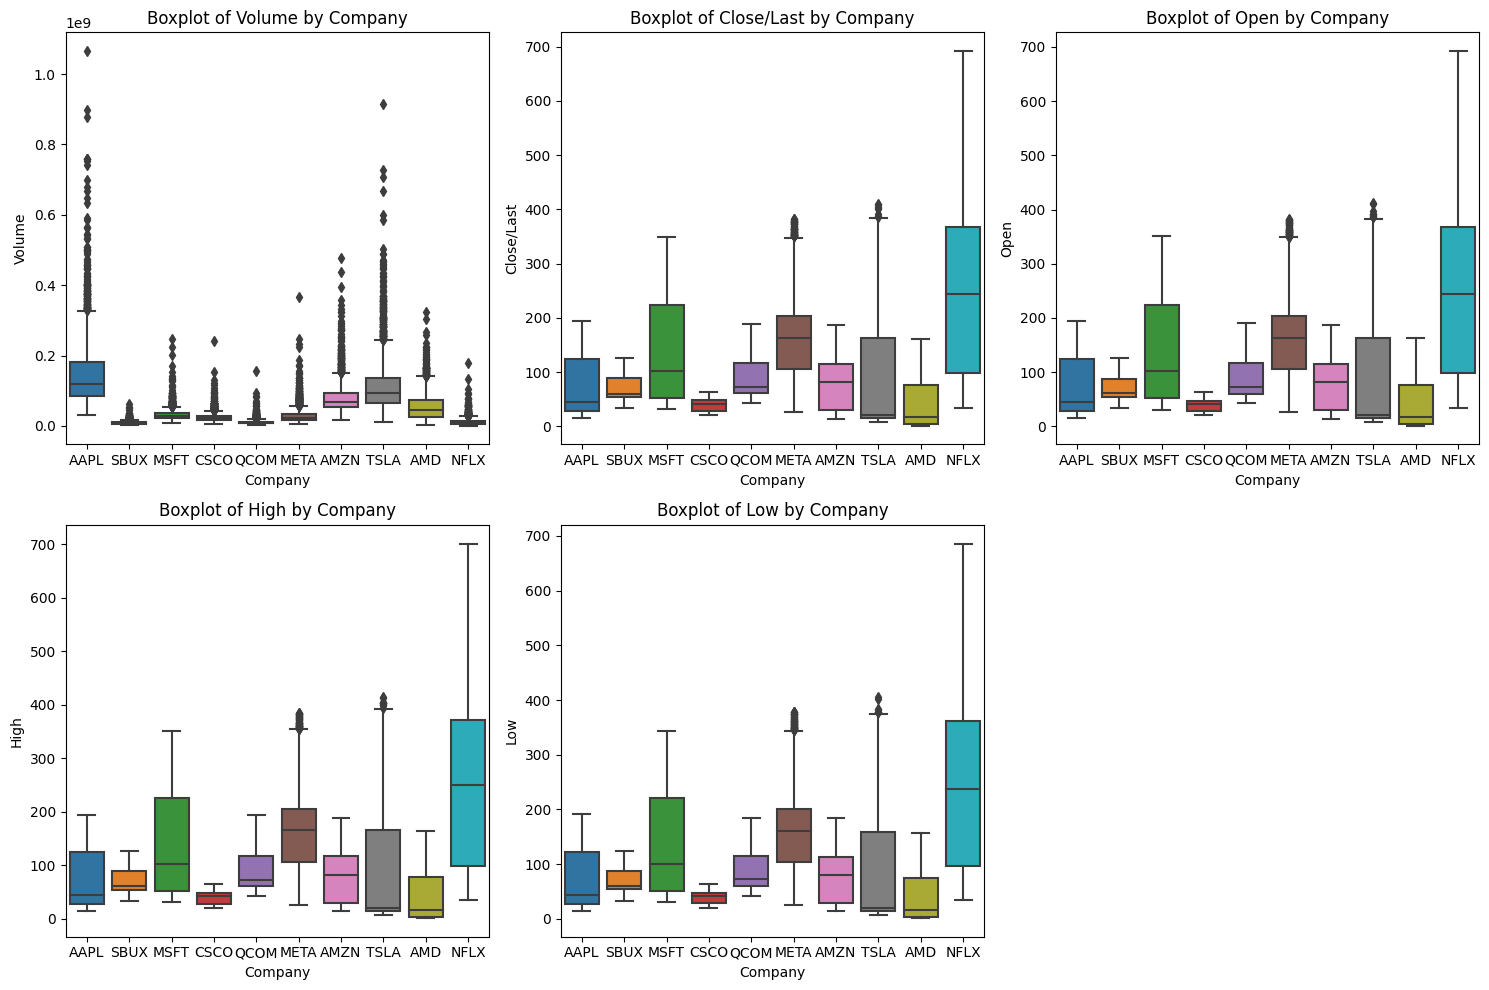

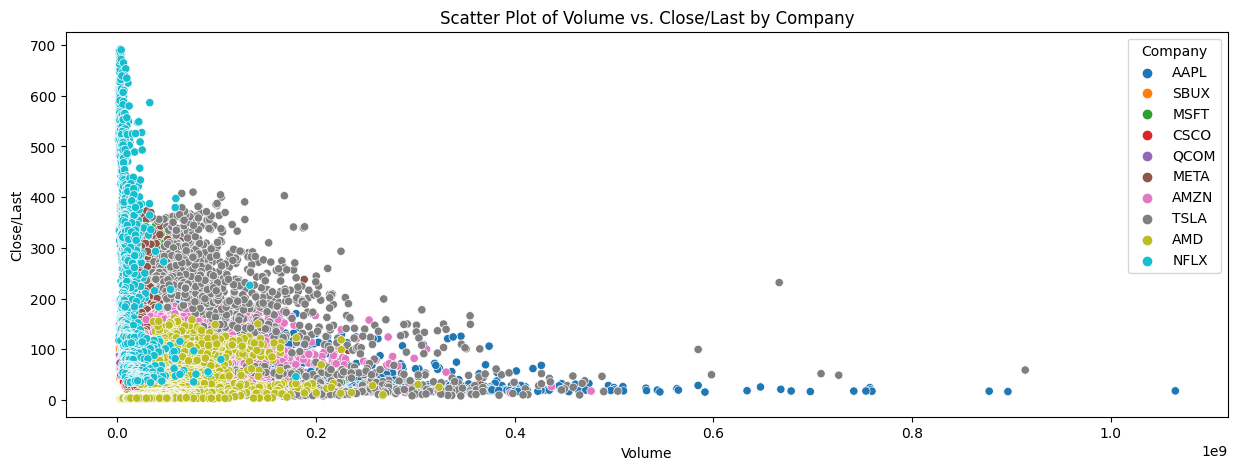

In [ ]:
# Grouped boxplots for Volume and stock prices
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Company', y=metric, data=data)
    plt.title(f'Boxplot of {metric} by Company')
plt.tight_layout()
plt.show()

# Grouped scatter plots for Volume vs. Close/Last
plt.figure(figsize=(15, 5))
sns.scatterplot(x='Volume', y='Close/Last', hue='Company', data=data)
plt.title('Scatter Plot of Volume vs. Close/Last by Company')
plt.show()


In [ ]:
# Research Question 2

import pandas as pd

# Loading the dataset
# data = pd.read_csv("/Users/humzagohar/Desktop/data.csv")
data = pd.read_csv("data.csv")

# Converting Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Cleaning the Close/Last, Open, High, Low columns to remove '$' and convert to numeric
for col in ['Close/Last', 'Open', 'High', 'Low']:
    data[col] = pd.to_numeric(data[col].str.replace('$', ''))

# Creating a one-hot encoding of the Company column
data = pd.get_dummies(data, columns=['Company'], drop_first=True)

# Displaying the first few rows of the dataset
print(data.head())

from sklearn.decomposition import PCA

# Defining features and target variable
X = data.drop(columns=['Close/Last', 'Date'])
y = data['Close/Last']

# Applying PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

print("Explained variance ratios:", pca.explained_variance_ratio_)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Random Forest
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))

# KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN MSE:", mean_squared_error(y_test, y_pred_knn))


<ipython-input-6-961b2c1b9952>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = pd.to_numeric(data[col].str.replace('$', ''))


        Date  Close/Last    Volume    Open      High     Low  Company_AMD  \
0 2023-07-17      193.99  50520160  191.90  194.3200  191.81            0   
1 2023-07-14      190.69  41616240  190.23  191.1799  189.63            0   
2 2023-07-13      190.54  41342340  190.50  191.1900  189.78            0   
3 2023-07-12      189.77  60750250  189.68  191.7000  188.47            0   
4 2023-07-11      188.08  46638120  189.16  189.3000  186.60            0   

   Company_AMZN  Company_CSCO  Company_META  Company_MSFT  Company_NFLX  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Company_QCOM  Company_SBUX  Company_TSLA  
0             0             0           

In [ ]:
# Research Question 3

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Loading the data
# data = pd.read_csv("/Users/humzagohar/Desktop/data.csv")
data = pd.read_csv("data.csv")

# Removing dollar signs and convert to float
columns_to_convert = ['Close/Last', 'Open', 'High', 'Low']
for col in columns_to_convert:
    data[col] = data[col].str.replace('$', '').astype(float)

# Creating binary variable indicating if the next day's close is higher than the current day's
data['Price_Up'] = data['Close/Last'].shift(-1) < data['Close/Last']

# Dropping the company column (for simplicity in this example)
data = data.drop(['Company', 'Date'], axis=1)

# Splitting data into train and test sets
X = data.drop(['Price_Up'], axis=1)[:-1]  # Exclude last row as it does not have a label
y = data['Price_Up'][:-1]  # Exclude last row as it does not have a label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




<ipython-input-7-8e17688d2790>:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].str.replace('$', '').astype(float)


In [ ]:
# Research Question 3

# Training a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predicting and evaluating
log_reg_preds = log_reg.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, log_reg_preds))
print("Logistic Regression Average Accuracy:", accuracy_score(y_test, log_reg_preds))

# Displaying coefficients
coeff = pd.Series(log_reg.coef_[0], index=X.columns)
print("Logistic Regression Coefficients:")
print(coeff)


Logistic Regression Results:
              precision    recall  f1-score   support

       False       0.90      0.56      0.69      2444
        True       0.69      0.94      0.80      2588

    accuracy                           0.75      5032
   macro avg       0.80      0.75      0.74      5032
weighted avg       0.79      0.75      0.74      5032

Logistic Regression Average Accuracy: 0.7547694753577107
Logistic Regression Coefficients:
Close/Last    26.490960
Volume         0.004979
Open         -25.059404
High          -2.461350
Low            1.020128
dtype: float64


In [ ]:
# Research Question 3

# Training a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting and evaluating
rf_preds = rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, rf_preds))
print("Random Forest Average Accuracy:", accuracy_score(y_test, rf_preds))

# Displaying feature importance
importance = pd.Series(rf.feature_importances_, index=X.columns)
print("Random Forest Feature Importance:")
print(importance)


Random Forest Results:
              precision    recall  f1-score   support

       False       0.77      0.77      0.77      2444
        True       0.78      0.79      0.79      2588

    accuracy                           0.78      5032
   macro avg       0.78      0.78      0.78      5032
weighted avg       0.78      0.78      0.78      5032

Random Forest Average Accuracy: 0.7782193958664547
Random Forest Feature Importance:
Close/Last    0.269861
Volume        0.138548
Open          0.259798
High          0.165816
Low           0.165977
dtype: float64


In [ ]:
# Research Question 4

import pandas as pd
import statsmodels.api as sm

# Loading the data
# data = pd.read_csv("/Users/humzagohar/Desktop/data.csv")
data = pd.read_csv("data.csv")

# Cleaning the data
data['Open'] = data['Open'].str.replace('$', '').astype(float)
data['Close/Last'] = data['Close/Last'].str.replace('$', '').astype(float)
data['Volume'] = data['Volume'].astype(float)

# Storing results
results_summary = {}

# Looping through each company and perform regression
for company in data['Company'].unique():
    company_data = data[data['Company'] == company]

    # Regression
    X = company_data['Volume']
    y = company_data['Close/Last']
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X)
    results = model.fit()

    # Storing the results
    results_summary[company] = {
        'const_coef': results.params['const'],
        'volume_coef': results.params['Volume'],
        'const_ci': results.conf_int().loc['const'].tolist(),
        'volume_ci': results.conf_int().loc['Volume'].tolist(),
        'R-squared': results.rsquared
    }

# Displaying the results
results_df = pd.DataFrame(results_summary).T
print(results_df)



      const_coef volume_coef                                  const_ci  \
AAPL  108.582553        -0.0   [105.2552181463606, 111.90988861812782]   
SBUX   81.851658   -0.000001     [79.9018779190469, 83.80143752946854]   
MSFT  155.619564   -0.000001   [147.5126541118261, 163.72647391847434]   
CSCO   46.245392        -0.0    [45.37393268673223, 47.11685068896024]   
QCOM   94.806752   -0.000001    [92.37712611547805, 97.23637698312801]   
META  204.515029   -0.000001   [199.85846266799786, 209.1715952405636]   
AMZN   77.803228         0.0    [73.40386299848919, 82.20259241459698]   
TSLA    94.43115        -0.0   [87.15526394851139, 101.70703577695829]   
AMD    17.916324         0.0  [15.392532162093513, 20.440116587538075]   
NFLX  338.892722   -0.000007    [330.0263809081646, 347.7590628212879]   

                                              volume_ci R-squared  
AAPL  [-2.748927142526294e-07, -2.3751011008193515e-07]  0.223219  
SBUX  [-1.5530596425153369e-06, -1.15837176622963

<ipython-input-10-5ecfb703ad90>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Open'] = data['Open'].str.replace('$', '').astype(float)
<ipython-input-10-5ecfb703ad90>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Close/Last'] = data['Close/Last'].str.replace('$', '').astype(float)
